In [121]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical


ModuleNotFoundError: No module named 'keras'

In [104]:
data = pd.read_csv('machine_readable.csv',sep=',')
data.head()

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
0,W_A11,2000-02,Moving average,59.666667,50.925823,68.407510,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
1,W_A11,2001-03,Moving average,60.000000,51.234775,68.765225,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
2,W_A11,2002-04,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
3,W_A11,2003-05,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,W_A11,2004-06,Moving average,61.333333,52.471252,70.195415,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal


In [105]:
data[['Period_S','Period']] = data.Period.str.split(pat = "-",expand=True)

In [106]:
def Severity(y):
    dic={'Fatal':0, 'Serious non-fatal':1, 'Serious':2}
    return dic.get(y)
data['Severity']= data['Severity'].apply(lambda x : Severity(x))


In [107]:
def Age(y):
    dic={'All ages':0, '0-74 years':1, '75+ years':2, '0-14 years':3}
    return dic.get(y)
data['Age']= data['Age'].apply(lambda x : Age(x))


In [108]:
def Population(y):
    dic={'Whole pop':0, 'Maori':1, 'Children':2}
    return dic.get(y)
data['Population']= data['Population'].apply(lambda x : Population(x))

In [109]:
def Validation(y):
    dic={'Validated':0, 'Provisional':1}
    return dic.get(y)
data['Validation']= data['Validation'].apply(lambda x : Validation(x))

In [110]:
def Cause(y):
    dic={'Assault':0, 'Falls':1, 'Work':2, 'Intentional self-harm':3,
       'Motor vehicle traffic crashes':4, 'Intentional':5, 'Pedestrian':6,
       'Car occupant':7, 'All':8, 'Drowing':9}
    return dic.get(y)
data['Cause']= data['Cause'].apply(lambda x: Cause(x))

In [111]:
def Indicator(y):
    dic={'Number':0, 'Age-standardised rate':1, 'Rate per billion km':2,
       'Rate per thousand registered vehicles':3}
    return dic.get(y)
data['Indicator']= data['Indicator'].apply(lambda x: Indicator(x))

In [112]:
def Units(y):
    dic={'Injuries':0, 'Per 100,000 people':1, 'Per 100,000 FTEs':2,
       'Per billion km':3, 'Per thousand registered vehicles':4}
    return dic.get(y)
data['Units']= data['Units'].apply(lambda x: Units(x))

In [113]:
def Type(y):
    dic={'Moving average':0,'Single year':1}
    return dic.get(y)
data['Type']= data['Type'].apply(lambda x : Type(x))    

In [114]:
def Series_reference(y):
    dic={'W_A11':0, 'W_A12':1, 'W_F11B':2, 'W_F12B':3, 'W_W12':4, 'W_W14':5, 'M_S11':6,
       'M_S12':7, 'M_F01C':8, 'M_F02C':9, 'M_F21C':10, 'M_F22C':11, 'M_W01':12, 'M_W02':13,
       'C_M11':14, 'C_M12':15, 'C_IN01':16, 'C_IN02':17, 'C_A21':18, 'C_A22':19, 'C_IN21':20,
       'C_IN22':21, 'C_P21':22, 'C_P22':23, 'C_C21':24, 'C_C22':25, 'W_I11':26, 'W_I12':28,
       'W_D11':29, 'W_D12':30, 'W_M11':31, 'W_M12':32, 'W_S11':33, 'W_S12':34, 'W_D13':35,
       'W_D14':36, 'W_S13':37, 'W_S14':38, 'W_F11A':39, 'W_F12A':40, 'W_F11C':41, 'W_F12C':42,
       'W_M13':43, 'W_M14':44, 'W_M15':45, 'W_M16':46, 'W_M17':47, 'W_M18':48, 'W_I01':49,
       'W_I02':50, 'W_A01':51, 'W_A02':52, 'W_S01':53, 'W_S02':54, 'W_F01A':55, 'W_F02A':56,
       'W_M01':57, 'W_M02':57, 'W_F01B':58, 'W_F02B':59, 'W_F01C':60, 'W_F02C':61, 'W_I21':62,
       'W_I22':63, 'W_A21':64, 'W_A22':65, 'W_S21':66, 'W_S22':67, 'W_F21A':68, 'W_F22A':69,
       'W_M21':70, 'W_M22':71, 'W_F21B':72, 'W_F22B':73, 'W_F21C':74, 'W_F22C':75, 'W_W01':76,
       'W_W02':78, 'W_W21':79, 'W_W22':80, 'M_I11':81, 'M_I12':82, 'M_M11':83, 'M_M12':84,
       'M_I01':85, 'M_I02':86, 'M_A01':87, 'M_A02':88, 'M_F01A':89, 'M_F02A':90, 'M_M01':91,
       'M_M02':92, 'M_I21':93, 'M_I22':94, 'M_A21':95, 'M_A22':96, 'M_S21':97, 'M_S22':98,
       'M_F21A':99, 'M_F22A':100, 'M_M21':101, 'M_M22':102, 'M_F21B':103, 'M_F22B':104, 'M_F01B':105,
       'M_F02B':106, 'C_I11':107, 'C_I12':108, 'C_I01':109, 'C_I02':110, 'C_M01':111, 'C_M02':112,
       'C_I21':113, 'C_I22':114, 'C_F21':115, 'C_F22':116, 'C_M21':117, 'C_M22':118, 'a12':119, 'a11':120,
       'f12b':121, 'f11b':122, 'w14':123, 'w12':124, 's12':125, 's11':126, 'm12':127, 'm11':128, 'f02c':129,
       'f01c':130, 'w02':131, 'w01':132, 'in02':133, 'in01':134, 'f22c':135, 'f21c':136, 'a22':137, 'a21':138,
       'c22':139, 'c21':140, 'in22':141, 'in21':142, 'p22':143, 'p21':144}
    return dic.get(y)

data['Series_reference']= data['Series_reference'].apply(lambda x : Series_reference(x))

In [115]:
data.head()

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity,Period_S
0,0,02,0,59.666667,50.925823,68.407510,0,0,0,0,0,0,0,2000
1,0,03,0,60.000000,51.234775,68.765225,0,0,0,0,0,0,0,2001
2,0,04,0,59.000000,50.308125,67.691875,0,0,0,0,0,0,0,2002
3,0,05,0,59.000000,50.308125,67.691875,0,0,0,0,0,0,0,2003
4,0,06,0,61.333333,52.471252,70.195415,0,0,0,0,0,0,0,2004


In [116]:
#Normalizing the data
data["Period"].fillna('9.5', inplace = True)
data['Period'] = X['Period'].astype(float)
x = data[['Period']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Period'] = pd.DataFrame(x_scaled)


x = data[['Data_value']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Data_value'] = pd.DataFrame(x_scaled)

x = data[['Lower_CI']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Lower_CI'] = pd.DataFrame(x_scaled)

x = data[['Upper_CI']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Upper_CI'] = pd.DataFrame(x_scaled)

x = data[['Period_S']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Period_S'] = pd.DataFrame(x_scaled)

x = data[['Series_reference']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data['Series_reference'] = pd.DataFrame(x_scaled)

In [117]:
#splitting into input and output
y = data.iloc[:,12]
X = data.drop(columns='Severity', axis=1)
X.head(100)

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Period_S
0,0.000000,0.000000,0,0.005037,0.004415,0.005674,0,0,0,0,0,0,0.000000
1,0.000000,0.066667,0,0.005066,0.004442,0.005704,0,0,0,0,0,0,0.058824
2,0.000000,0.133333,0,0.004980,0.004361,0.005614,0,0,0,0,0,0,0.117647
3,0.000000,0.200000,0,0.004980,0.004361,0.005614,0,0,0,0,0,0,0.176471
4,0.000000,0.266667,0,0.005180,0.004549,0.005824,0,0,0,0,0,0,0.235294
5,0.000000,0.333333,0,0.005322,0.004684,0.005974,0,0,0,0,0,0,0.294118
6,0.000000,0.400000,0,0.004838,0.004227,0.005464,0,0,0,0,0,0,0.352941
7,0.000000,0.466667,0,0.005379,0.004738,0.006034,0,0,0,0,0,0,0.411765
8,0.000000,0.533333,0,0.005408,0.004765,0.006064,0,0,0,0,0,0,0.470588
9,0.000000,0.600000,0,0.005436,0.004792,0.006094,0,0,0,0,0,0,0.529412


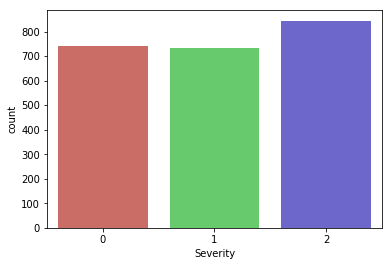

In [118]:
y.value_counts()
sns.countplot(x='Severity',data=data,palette='hls')
plt.show()


In [120]:
y = pd.get_dummies(y, prefix = None)